In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.shape

(768, 9)

In [13]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

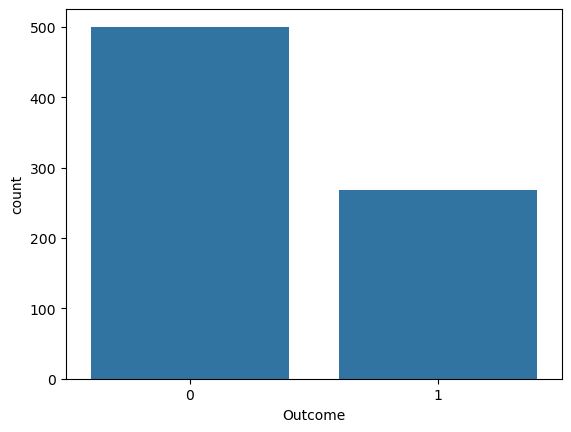

In [15]:
sns.countplot(x='Outcome', data=df)

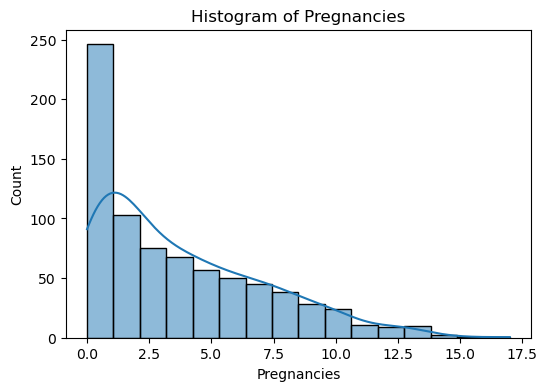

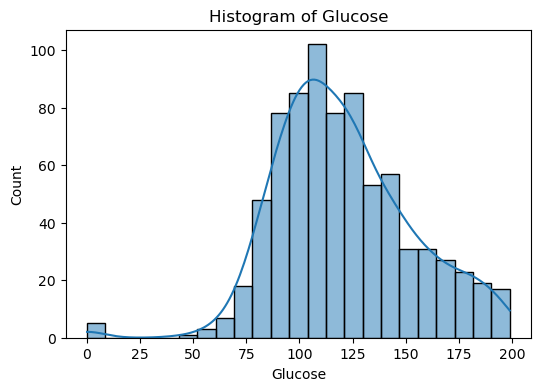

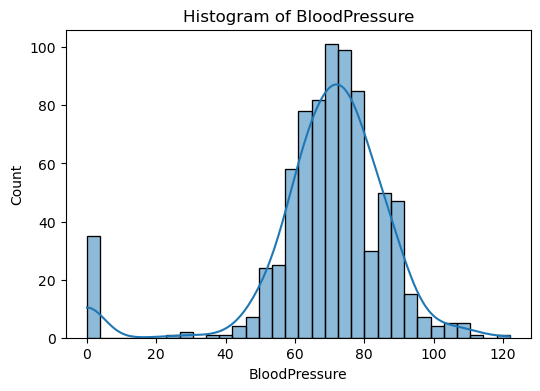

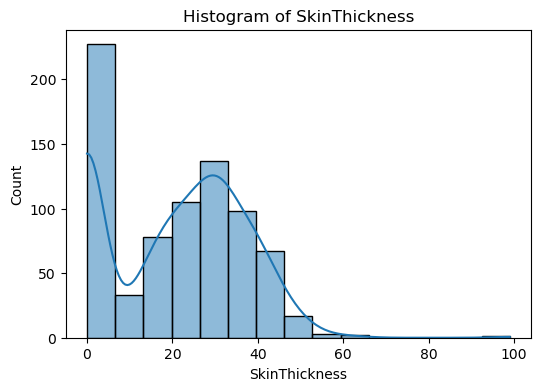

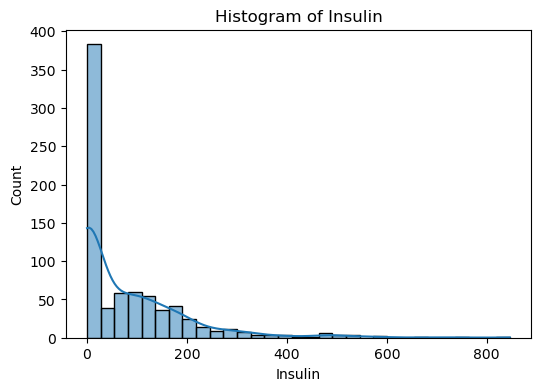

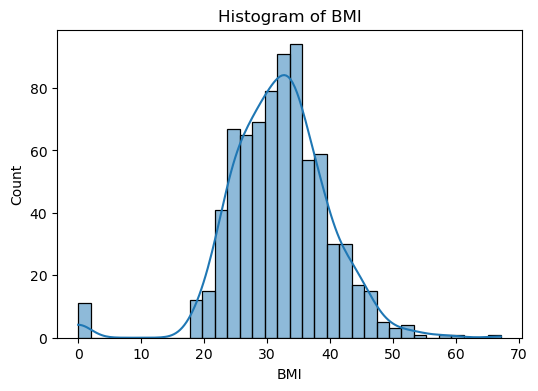

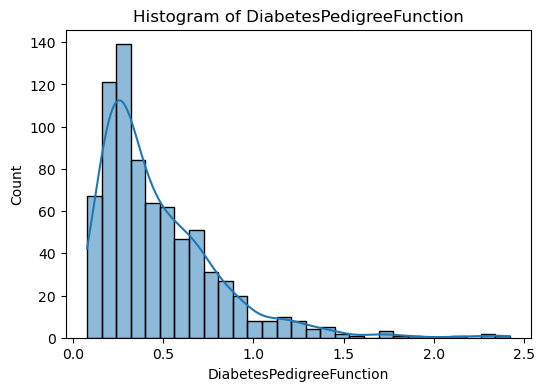

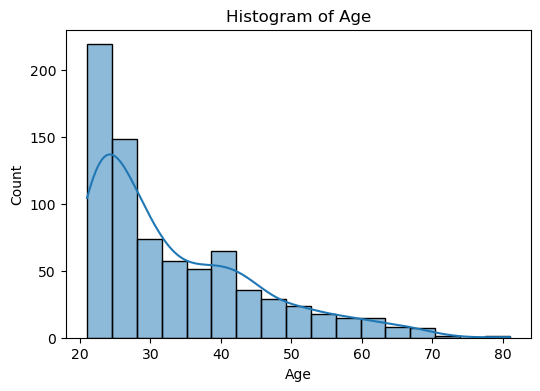

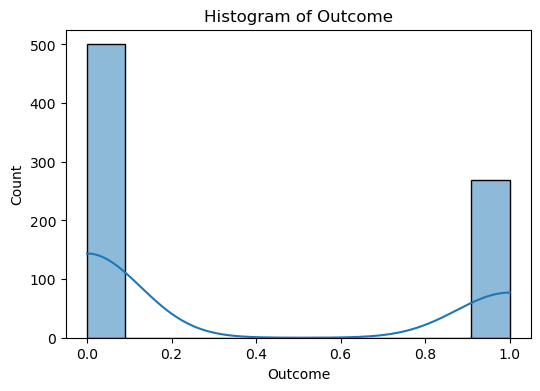

In [17]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        sns.countplot(x=df[column])
        plt.title(f'Countplot of {column}')
    

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

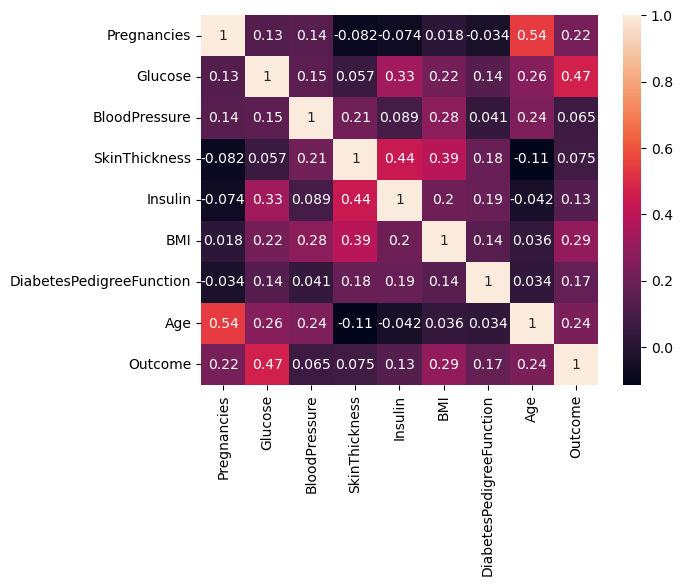

In [21]:
sns.heatmap(df.corr(), annot=True)

In [22]:
import xgboost as xgb

In [23]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = xgb.XGBClassifier()
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [30]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [31]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"En iyi parametreler: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
En iyi parametreler: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [37]:
best_model = grid_search.best_estimator_

# Cross-validation ile değerlendirme yap
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation doğruluğu: {cv_scores.mean()} ± {cv_scores.std()}")

Cross-validation doğruluğu: 0.7603913273400317 ± 0.042390647049010174


In [38]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test seti doğruluğu: {accuracy}")

Test seti doğruluğu: 0.7662337662337663


In [41]:
# XGBoost modelini tanımla
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# GridSearchCV için parametreler
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")

# En iyi model ile cross-validation ile değerlendirme yap
best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation doğruluğu: {cv_scores.mean()} ± {cv_scores.std()}")

# Test setinde değerlendirme yap
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test seti doğruluğu: {accuracy}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
En iyi parametreler: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Cross-validation doğruluğu: 0.7703585232573638 ± 0.027390130706376414
Test seti doğruluğu: 0.7337662337662337


In [42]:
mse_score = mean_squared_error(y_test, y_pred)

In [43]:
print(f"MSE: {mse_score}")

MSE: 0.2662337662337662


In [44]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Recall: 0.6363636363636364


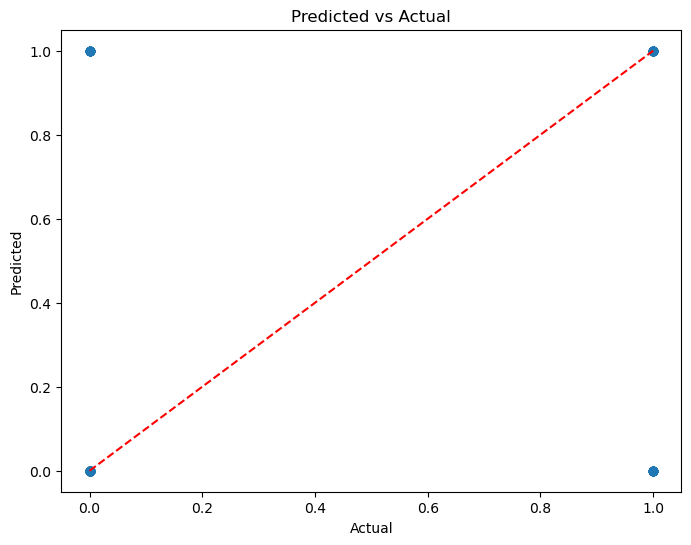

In [50]:
y_actual = y_test  # Gerçek değerler
y_pred = y_pred   # Tahmin edilen değerler

plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Y = X doğrusunu ekle
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

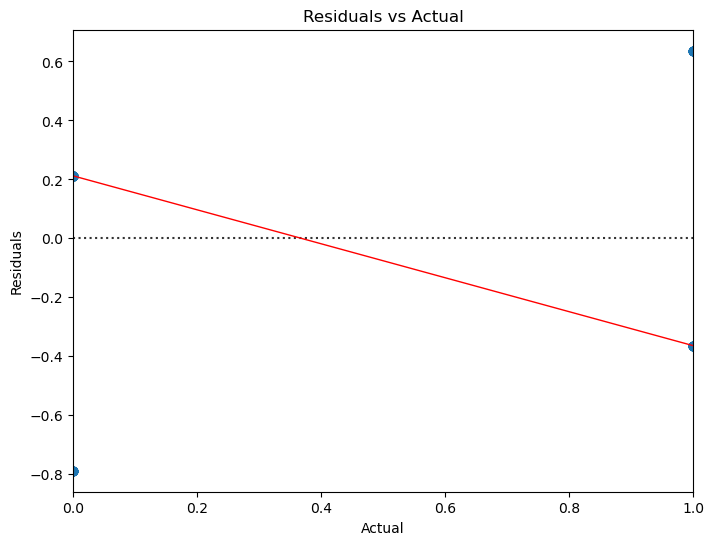

In [51]:
residuals = y_actual - y_pred

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_actual, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title("Residuals vs Actual")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()

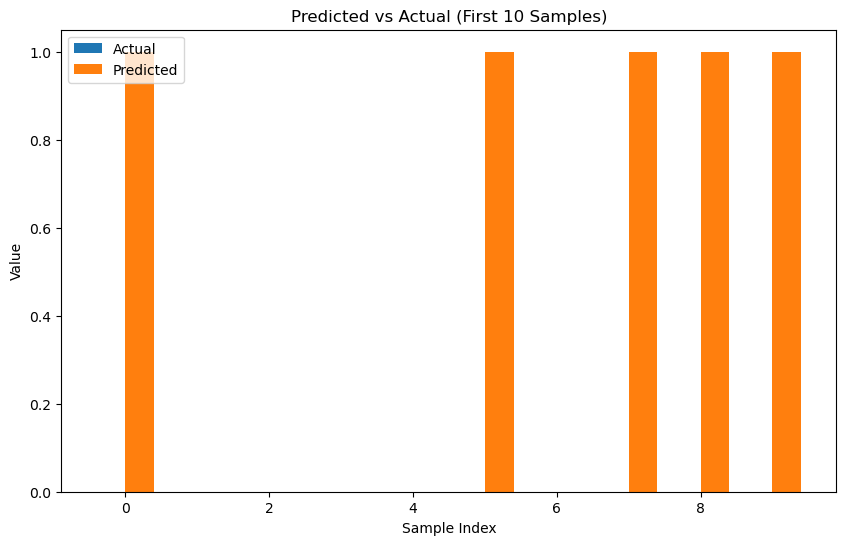

In [52]:
indices = np.arange(10)  # Örnek olarak ilk 10 örneği al

plt.figure(figsize=(10, 6))
plt.bar(indices - 0.2, y_actual[:10], width=0.4, label='Actual', align='center')
plt.bar(indices + 0.2, y_pred[:10], width=0.4, label='Predicted', align='center')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual (First 10 Samples)')
plt.legend()
plt.show()

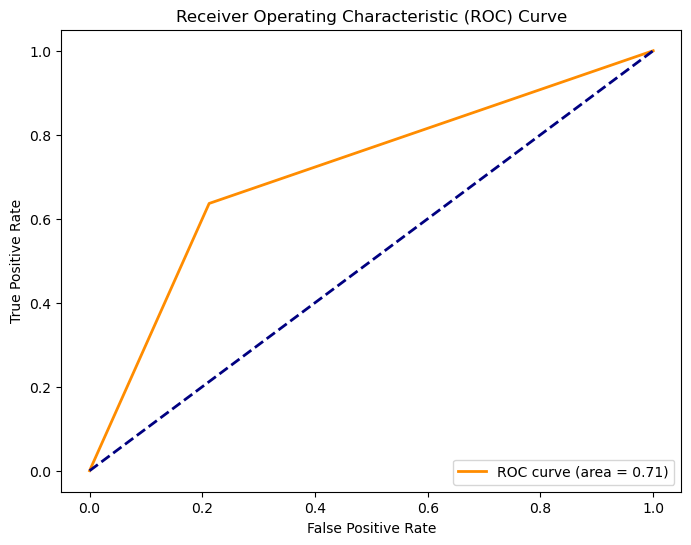

In [53]:
from sklearn.metrics import roc_curve, auc

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()